学号：1120201241 姓名：赵羽菲  数据挖掘互评作业二: 频繁模式与关联规则挖掘
仓库地址：https://github.com/sususutang/DM_HW2

本次实验选择SNAP中的引用网络Cit_HepTh数据集和DBLP数据集进行频繁模式和关联规则挖掘。
数据分析要求：
（1）数据获取与预处理；
（2）频繁模式挖掘：可以是项集、序列和图。
（3）模式命名：如论文-作者网络中合作模式、引用模式和发表模式等，不同的领域的频繁模式的含义也不尽相同，需自行确定模式的名称。
（4）对挖掘结果进行分析；
（5）可视化展示。

本报告是SNAP中的引用网络Cit_HepTh数据集的挖掘过程报告，频繁模式为引用模式，旨在挖掘经常一起被引用的一组论文。

In [8]:
import sys
from xml.sax import handler, make_parser
import pickle
import os
import csv
import pandas as pd
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
# data_path是数据集的路径
data_path = "./Cit-HepTh.txt"
csv_path = "./Cit-HepTh.csv"

In [6]:
# 这一部分是对数据集的预处理：
transactions = [] # 用于存储某一篇论文引用的所有论文，即一个事务
paper_id = 1001 #是数据集中第一篇论文的id，用于辅助后续数据集处理
with open(data_path,'r') as f: # 读取数据集
    lines = f.readlines()
    transaction = []
    for line in lines:
        if(line.startswith('#')):
            continue
        line = line.strip()
        ls = line.split('\t')
        if(int(ls[0])==paper_id):
            transaction.append(int(ls[1])) # 将这一篇论文引用的所有论文均记录在transac中
        else:
            transactions.append(transaction)
            transaction = []
            paper_id = int(ls[0])
            transaction.append(int(ls[1])) # 循环，直至处理完所有数据
    transactions.append(transaction) # transactions存储所有的事务，用于后续频繁模式和关联规则挖掘

In [9]:
# 分析最常被引用的论文

counter = Counter()
# 统计每个子列表中出现的值
for sublist in transactions:
    counter.update(sublist)

# 获取出现频率最高的前十个值及其出现次数
most_common_values = counter.most_common(10)

# 打印结果
for value, count in most_common_values:
    print(f"Paper_id: {value}，出现次数: {count}")

Paper_id: 9711200，出现次数: 2414
Paper_id: 9802150，出现次数: 1775
Paper_id: 9802109，出现次数: 1641
Paper_id: 9407087，出现次数: 1299
Paper_id: 9610043，出现次数: 1199
Paper_id: 9510017，出现次数: 1155
Paper_id: 9908142，出现次数: 1144
Paper_id: 9503124，出现次数: 1114
Paper_id: 9906064，出现次数: 1032
Paper_id: 9408099，出现次数: 1006


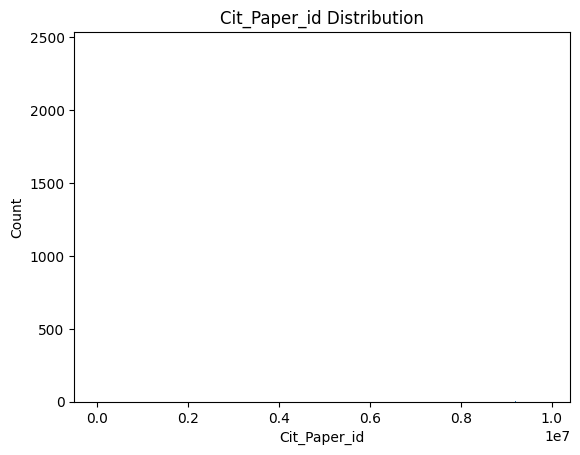

In [12]:
values = counter.keys()
counts = counter.values()

# 绘制柱状图
plt.bar(values, counts)

# 添加标题和轴标签
plt.title('Cit_Paper_id Distribution')
plt.xlabel('Cit_Paper_id')
plt.ylabel('Count')

# 显示图形，数据过多，可视化效果不明显
plt.show()

                  0
count  23180.000000
mean      15.220319
std       43.139529
min        1.000000
25%        2.000000
50%        6.000000
75%       14.000000
max     2414.000000


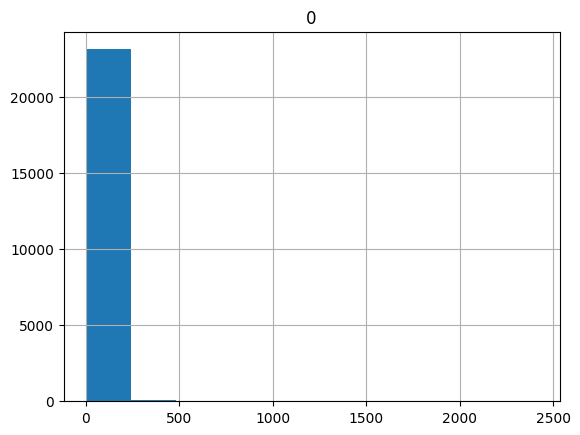

In [13]:
counts_df = pd.DataFrame(counts)
summary = counts_df.describe()

# 打印统计摘要信息
print(summary)
hist = counts_df.hist()

In [14]:
# 将数据的格式转化为布尔矩阵形式，便于关联规则挖掘
te = TransactionEncoder()
encoded_data = te.fit_transform(transactions)
df = pd.DataFrame(encoded_data, columns=te.columns_)

In [15]:
# 计算引用模式的频繁项集
Cit_frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
print(Cit_frequent_itemsets)

    support                     itemsets
0  0.051838                    (9407087)
1  0.096333                    (9711200)
2  0.065485                    (9802109)
3  0.070833                    (9802150)
4  0.062293           (9711200, 9802109)
5  0.066044           (9711200, 9802150)
6  0.062493           (9802109, 9802150)
7  0.060058  (9711200, 9802109, 9802150)


In [22]:
# 计算关联规则
Cit_rules = association_rules(Cit_frequent_itemsets, metric="confidence", min_threshold=0.8)
print(Cit_rules.head())

          antecedents consequents  antecedent support  consequent support  \
0           (9802109)   (9711200)            0.065485            0.096333   
1           (9802150)   (9711200)            0.070833            0.096333   
2           (9802109)   (9802150)            0.065485            0.070833   
3           (9802150)   (9802109)            0.070833            0.065485   
4  (9711200, 9802109)   (9802150)            0.062293            0.070833   

    support  confidence       lift  leverage  conviction  zhangs_metric  
0  0.062293    0.951249   9.874629  0.055985   18.536476       0.961708  
1  0.066044    0.932394   9.678902  0.059221   13.366746       0.965039  
2  0.062493    0.954296  13.472511  0.057854   20.330178       0.990648  
3  0.062493    0.882254  13.472511  0.057854    7.936667       0.996349  
4  0.060058    0.964126  13.611280  0.055646   25.900535       0.988082  


In [23]:
# 打印关联规则的支持度、置信度、提升度和确信度
Cit_rules = Cit_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift','conviction']]
print(Cit_rules)

          antecedents         consequents   support  confidence       lift  \
0           (9802109)           (9711200)  0.062293    0.951249   9.874629   
1           (9802150)           (9711200)  0.066044    0.932394   9.678902   
2           (9802109)           (9802150)  0.062493    0.954296  13.472511   
3           (9802150)           (9802109)  0.062493    0.882254  13.472511   
4  (9711200, 9802109)           (9802150)  0.060058    0.964126  13.611280   
5  (9711200, 9802150)           (9802109)  0.060058    0.909366  13.886527   
6  (9802109, 9802150)           (9711200)  0.060058    0.961047   9.976339   
7           (9802109)  (9711200, 9802150)  0.060058    0.917124  13.886527   
8           (9802150)  (9711200, 9802109)  0.060058    0.847887  13.611280   

   conviction  
0   18.536476  
1   13.366746  
2   20.330178  
3    7.936667  
4   25.900535  
5   10.310810  
6   23.199067  
7   11.269276  
8    6.164555  


挖掘结果分析：
针对以上实验结果，我们可以得到如下强相关规则：
(9802109) -> (9711200) 具有置信度 0.951249 和提升度 9.874629。
(9802150) -> (9711200) 具有置信度 0.932394 和提升度 9.678902。
(9802109) -> (9802150) 具有置信度 0.954296 和提升度 13.472511。
(9802109, 9802150) -> (9711200) 具有置信度 0.961047 和提升度 9.976339， 等等。

因此，论文9802109被引用时，9711200也常常被引用；论文9808150被引用时，9711200也常常被引用；论文9808109被引用时，9802150也常常被引用；论文9802109和论文9802150被引用时，9711200也常常被引用。

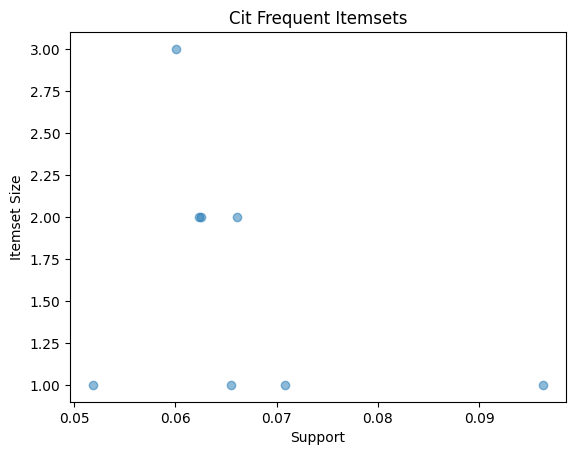

In [18]:
# 频繁项集的支持度和项集大小的关系图
plt.scatter(Cit_frequent_itemsets['support'], Cit_frequent_itemsets['itemsets'].apply(len), alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Itemset Size')
plt.title('Cit Frequent Itemsets')
plt.show()

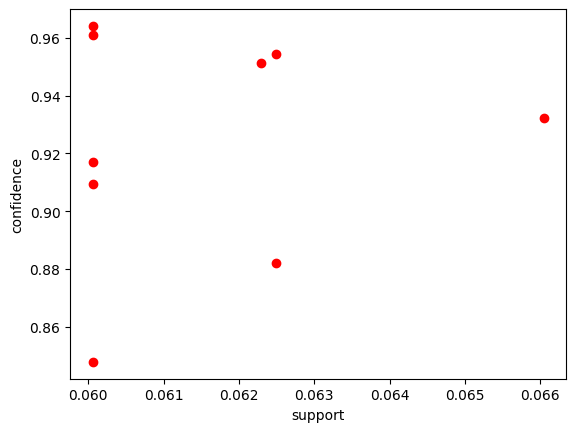

In [20]:
# 支持度与置信度关联关系展示
plt.xlabel('support')
plt.ylabel('confidence')
for i in range(Cit_rules.shape[0]):
    plt.scatter(Cit_rules.support[i],Cit_rules.confidence[i],c='r')

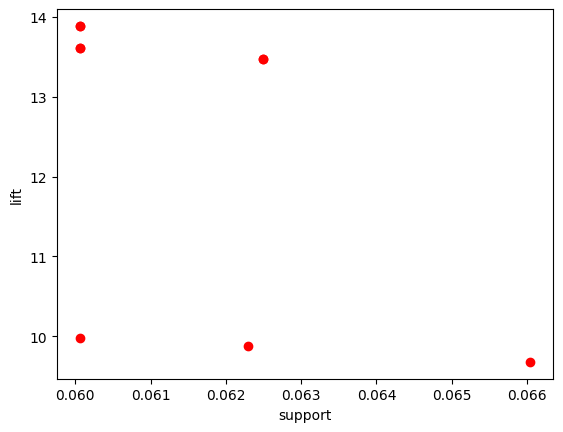

In [21]:
# 支持度与lift关联关系展示
plt.xlabel('support')
plt.ylabel('lift')
for i in range(Cit_rules.shape[0]):
    plt.scatter(Cit_rules.support[i],Cit_rules.lift[i],c='r')